In [ ]:
from google.colab import drive
drive.mount('/content/drive') # mount 를 여기에 해줘

import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks")

from multiclass_functions1 import * # all
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

DEVICE =  "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cpu
cpu


In [ ]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
new_model_train = True
model_type = "MLP"
dataset = "MNIST"

save_model_path = f"/content/drive/MyDrive/Colab Notebooks/results/{model_type}_{dataset}.pt"

In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class MLP(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(28*28,100), # 각 픽셀을 채널로 본다
                                    nn.ReLU(),
                                    nn.Linear(100,10)
                                    )
    def forward(self, x):
        x = self.linear(torch.flatten(x, start_dim = 1))
        return x

In [ ]:
exec(f"model = {model_type}().to(DEVICE)")
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


Epoch: 1, train loss: 0.317
--------------------
Epoch: 2, train loss: 0.144
--------------------
Epoch: 3, train loss: 0.1
--------------------
Epoch: 4, train loss: 0.075
--------------------
Epoch: 5, train loss: 0.059
--------------------


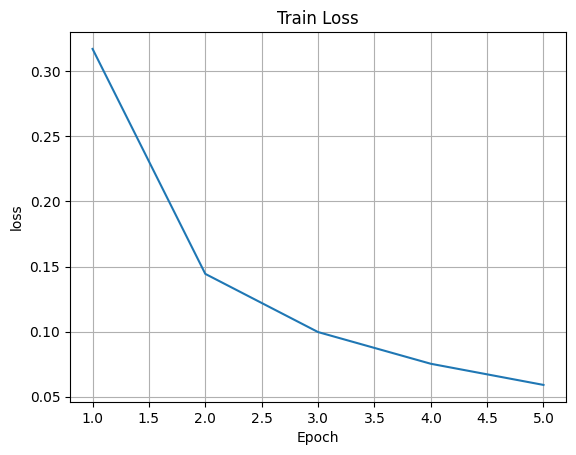

In [ ]:
if new_model_train:

    optimizer = optim.Adam(model.parameters(), lr = LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model.state_dict(), save_model_path)

    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title("Train Loss")
    plt.grid()

In [ ]:
load_model = MLP()
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))

<All keys matched successfully>

In [ ]:
Test(load_model, test_DL)
print(count_params(load_model))

Test Accuracy: 97.47 (97.47 %)
79510


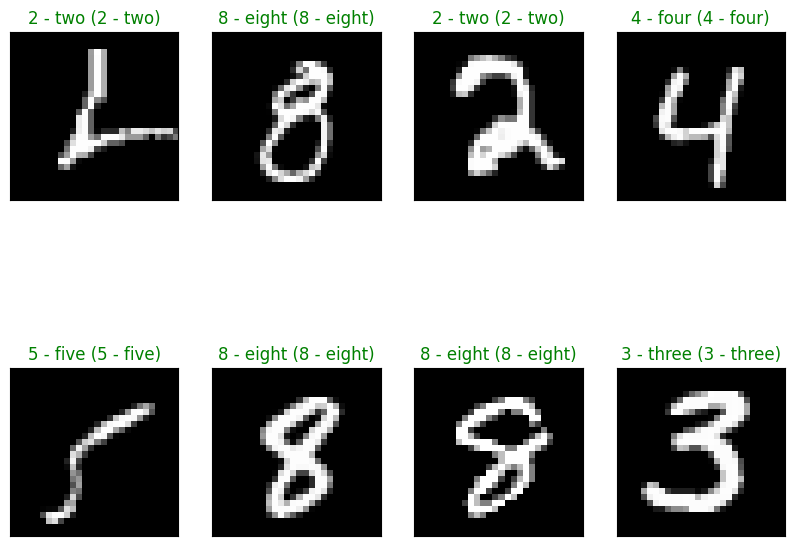

In [ ]:
Test_plot(load_model, test_DL)